<a href="https://colab.research.google.com/github/Simar-malhotra09/Boj_irs/blob/master/microscopy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# Load all the files from google drive

from google.colab import drive
drive.mount('/content/drive')

import os
image_dir = '/content/drive/MyDrive/mos2_titan/'


Mounted at /content/drive


some sources:
1. https://forum.step.esa.int/t/pixel-information-in-exported-tiff-file/8603

In [3]:
# Install the core libs, tifffile is used to perform file I/O with our data

!pip install tifffile pillow matplotlib


In [27]:
# gdal is just a cli tool that allows you to get metadata about your tiff file

!apt-get install -y gdal-bin

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  python3-gdal python3-numpy
Suggested packages:
  libgdal-grass python-numpy-doc python3-pytest
The following NEW packages will be installed:
  gdal-bin python3-gdal python3-numpy
0 upgraded, 3 newly installed, 0 to remove and 35 not upgraded.
Need to get 5,168 kB of archives.
After this operation, 25.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 python3-numpy amd64 1:1.21.5-1ubuntu22.04.1 [3,467 kB]
Get:2 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy/main amd64 python3-gdal amd64 3.8.4+dfsg-1~jammy0 [1,095 kB]
Get:3 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy/main amd64 gdal-bin amd64 3.8.4+dfsg-1~jammy0 [605 kB]
Fetched 5,168 kB in 2s (3,092 kB/s)
Selecting previously unselected package python3-numpy.
(Reading database ... 126319 files and direc

In [11]:
# tif_folder is the path where all the images are located

tif_folder =image_dir

In [12]:
tif_folder

'/content/drive/MyDrive/mos2_titan/'

/content/drive/MyDrive/mos2_titan/5_0001.tif


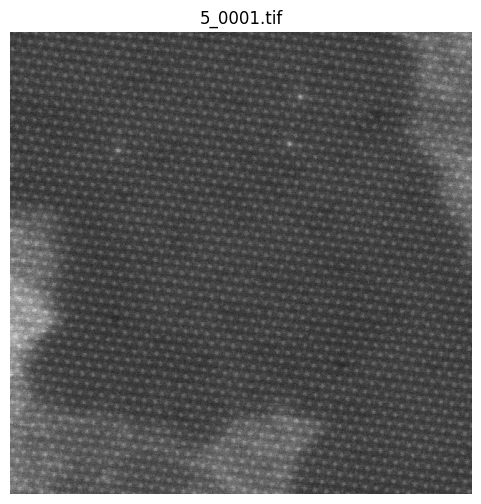

/content/drive/MyDrive/mos2_titan/5_0002.tif


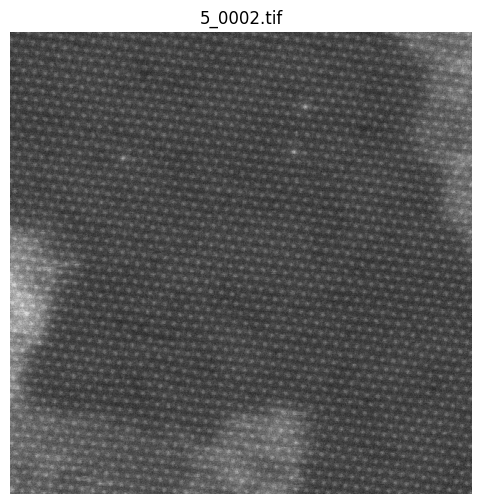

In [13]:
# here we are just trying to 'plot' all images to have a reference


import os
import tifffile as tiff
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np


# this sorts the files in the correct chronological order
tif_files = sorted([f for f in os.listdir(tif_folder) if f.endswith('.tif')])

# count is just a variable to control how many images you want to plot
# to plot all, set count to len(images)+1.
count=0

for file in tif_files:
  if count <24:
    count+=1
    # join the base folder path with the image filename
    img_path = os.path.join(tif_folder, file)

    # uncomment to show the path
    # print(img_path)

    # this load the image in memory
    img = tiff.imread(img_path)

    # control the size of each image plotted
    plt.figure(figsize=(6,6))
    plt.imshow(img, cmap='gray')

    # general nicities
    plt.title(file)
    plt.axis('off')

    # plot image
    plt.show()

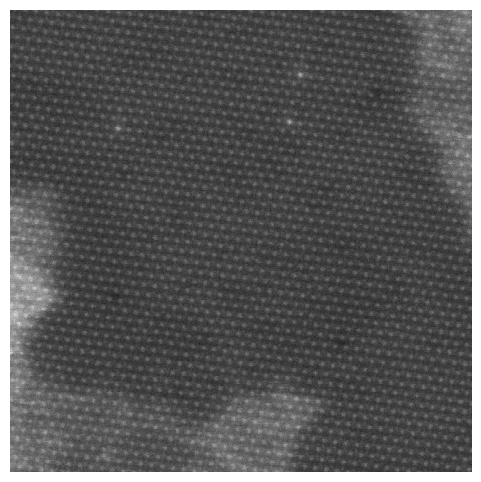

In [15]:
# pick a sample image to do exploratory analysis

sample_img= os.path.join(tif_folder, "5_0001.tif")
img = tiff.imread(sample_img)

plt.figure(figsize=(6,6))
plt.imshow(img, cmap='gray')

plt.axis('off')
plt.show()

In [30]:
# get metadata for the sample image using gdalinfo

# note: This is a shell command, not a Python function.
# so you CANNOT write `gdalinfo sample_img` (that would look for a file literally named "sample_img").

# cli stands for command line interface ie a way to interact with tools like gdalinfo via the shell.
# in colab, you access the shell by prefixing commands with `!`.

# here, `gdalinfo` is the cli tool, and we pass it the path stored in our python variable.
# we use `"$sample_img"` to substitute the actual path into the shell command.

!gdalinfo "$sample_img"

Warning 1: /content/drive/MyDrive/mos2_titan/5_0001.tif: TIFFReadDirectoryCheckOrder:Invalid TIFF directory; tags are not sorted in ascending order
Driver: GTiff/GeoTIFF
Files: /content/drive/MyDrive/mos2_titan/5_0001.tif
Size is 2048, 2048
Metadata:
  TIFFTAG_RESOLUTIONUNIT=3 (pixels/cm)
  TIFFTAG_XRESOLUTION=1.508452e+09
  TIFFTAG_YRESOLUTION=1.508452e+09
Image Structure Metadata:
  INTERLEAVE=BAND
Warning 1: TIFFReadDirectoryCheckOrder:Invalid TIFF directory; tags are not sorted in ascending order
Corner Coordinates:
Upper Left  (    0.0,    0.0)
Lower Left  (    0.0, 2048.0)
Upper Right ( 2048.0,    0.0)
Lower Right ( 2048.0, 2048.0)
Center      ( 1024.0, 1024.0)
Band 1 Block=2048x2 Type=UInt16, ColorInterp=Gray
